In [1]:
try:
    import google.colab  # noqa: F401

    # specify the version of DataEval (==X.XX.X) for versions other than the latest
    %pip install -q dataeval maite-datasets
except Exception:
    pass

In [2]:
from maite_datasets.object_detection import VOCDetection

# Load the functions from DataEval that are helpful for bias
# as well as the VOCDetection dataset for the tutorial
from dataeval.data import Metadata
from dataeval.evaluators.bias import Balance, Diversity, Parity

In [3]:
# Download the 2012 train dataset and verify the size of the loaded dataset
ds = VOCDetection(root="./data", download=True, image_set="train", year="2012")
len(ds)

5717

In [4]:
# Extract the Metadata from the dataset
metadata = Metadata(ds)

In [5]:
metadata.raw[0]

Processing datum metadata:   0%|          | 0/5717 [00:00<?, ?it/s]

{'id': 0,
 'year': '2008',
 'image_id': '000008',
 'mask_path': '/builds/jatic/aria/dataeval/docs/source/notebooks/data/vocdataset/VOCdevkit/VOC2012/SegmentationClass/2008_000008.jpg',
 'folder': 'VOC2012',
 'filename': '2008_000008.jpg',
 'database': 'The VOC2008 Database',
 'annotation_source': 'PASCAL VOC2008',
 'image_source': 'flickr',
 'image_width': 500,
 'image_height': 442,
 'image_depth': 3,
 'segmented': 0,
 'pose': ['Left', 'Unspecified'],
 'truncated': [0, 1],
 'difficult': [0, 0]}

In [6]:
metadata.include = [
    "image_width",
    "image_height",
    "segmented",
    "pose",
    "truncated",
    "difficult",
]

metadata.continuous_factor_bins = {
    "image_width": 5,
    "image_height": 5,
}

In [7]:
bal = Balance().evaluate(metadata)

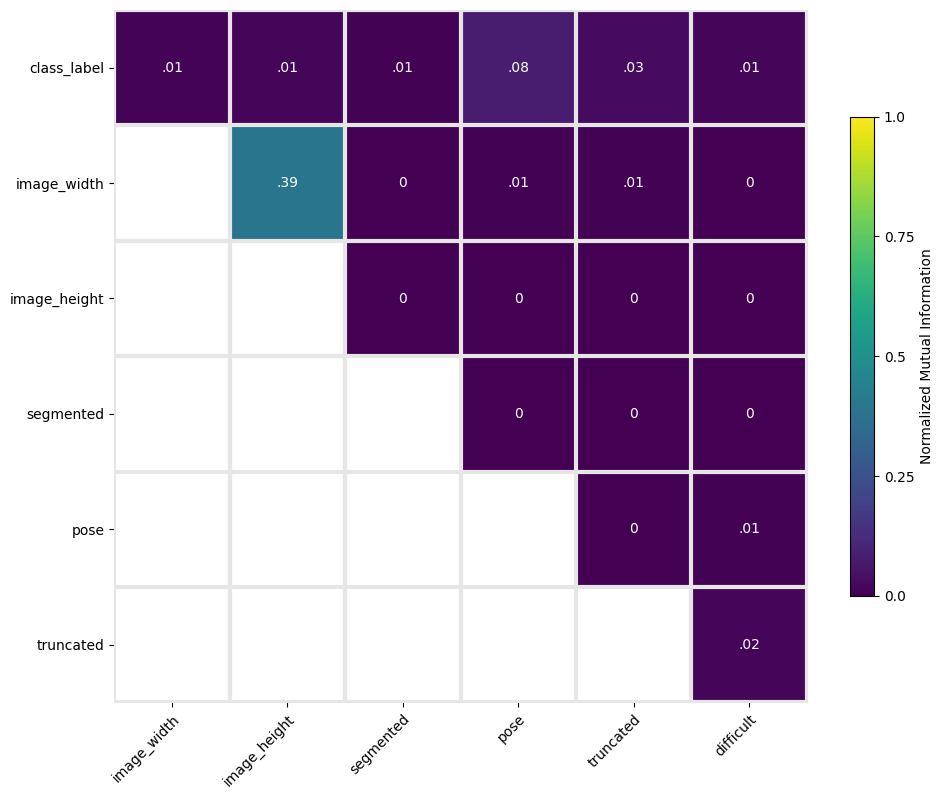

In [8]:
_ = bal.plot()

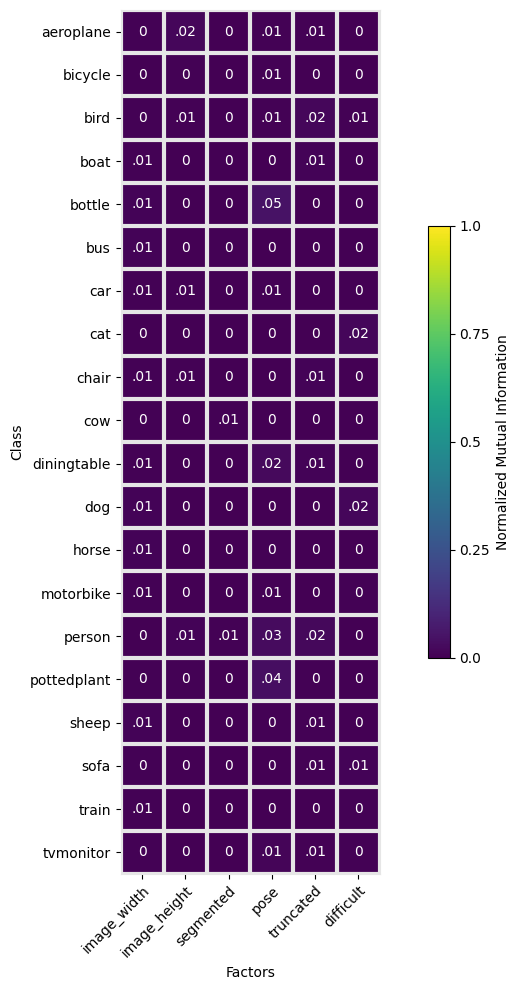

In [9]:
_ = bal.plot(plot_classwise=True)

In [10]:
div = Diversity().evaluate(metadata)

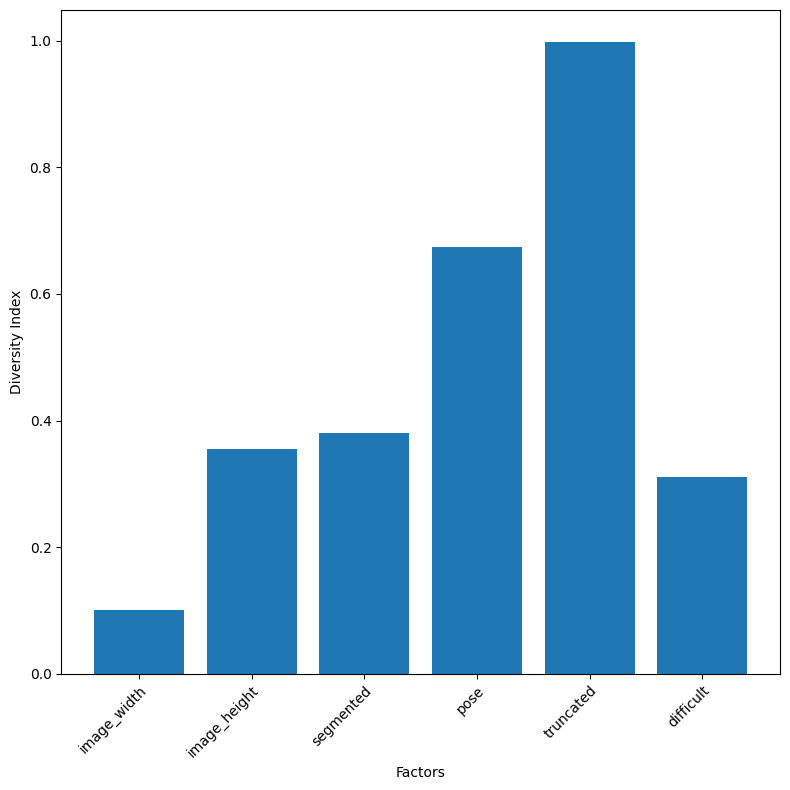

In [11]:
_ = div.plot()

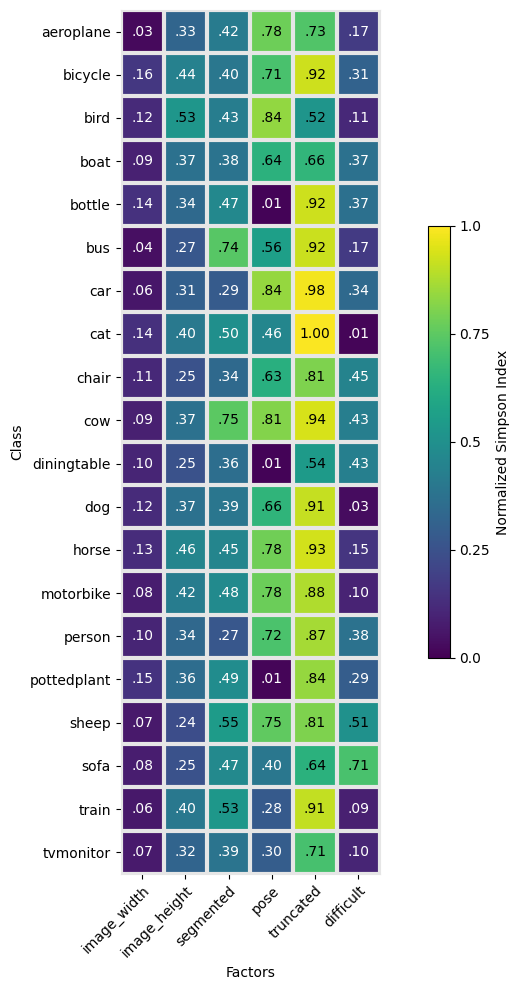

In [12]:
_ = div.plot(plot_classwise=True)

In [13]:
par = Parity().evaluate(metadata)

In [14]:
par.factors

factor_name,score,p_value,is_correlated,has_insufficient_data
cat,f64,f64,bool,bool
"""image_width""",0.065081,1.3229e-35,false,true
"""image_height""",0.111873,3.1729e-134,false,true
"""segmented""",0.114267,3.4999e-37,false,false
"""pose""",0.280054,0.0,false,true
"""truncated""",0.301352,1.1974e-296,true,false
"""difficult""",0.199981,1.5190e-125,false,true
